# Nama : Ahmad Jalu Fahreza Nur Hakim
# NIM  : H071201057

# REGRESI

## 1. Read Data Set

Informasi Atribut : (Integer, Real)
Ada 13 atribut yang ada pada data set ini
1. age : umur pasien (years)
2. anaemia : Boolean
3. high blood pressure : Boolean
4. creatinine phosphokinase (CPK) : mcg/L
5. diabetes : Boolean
6. ejection fraction : percentage
7. platelets : mL
8. sex : binary
9. serum creatinine : mg/dL
10. serum sodium : mEq/L
11. smoking : Boolean
12. time : days
13. [target] death event : Boolean


### 1.1 Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Menampilkan Data Set

In [3]:
df = pd.read_csv('Data/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### 1.3 Cleaning Data

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### 1.4 Split Data

In [12]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Memisahkan dataset menjadi data training dan testing
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=0.2, random_state=42)
print('Jumlah data train:',len(x_train))
print('Jumlah data test :',len(x_test))

Jumlah data train: 239
Jumlah data test : 60


### 1.5 Visualisasi Data

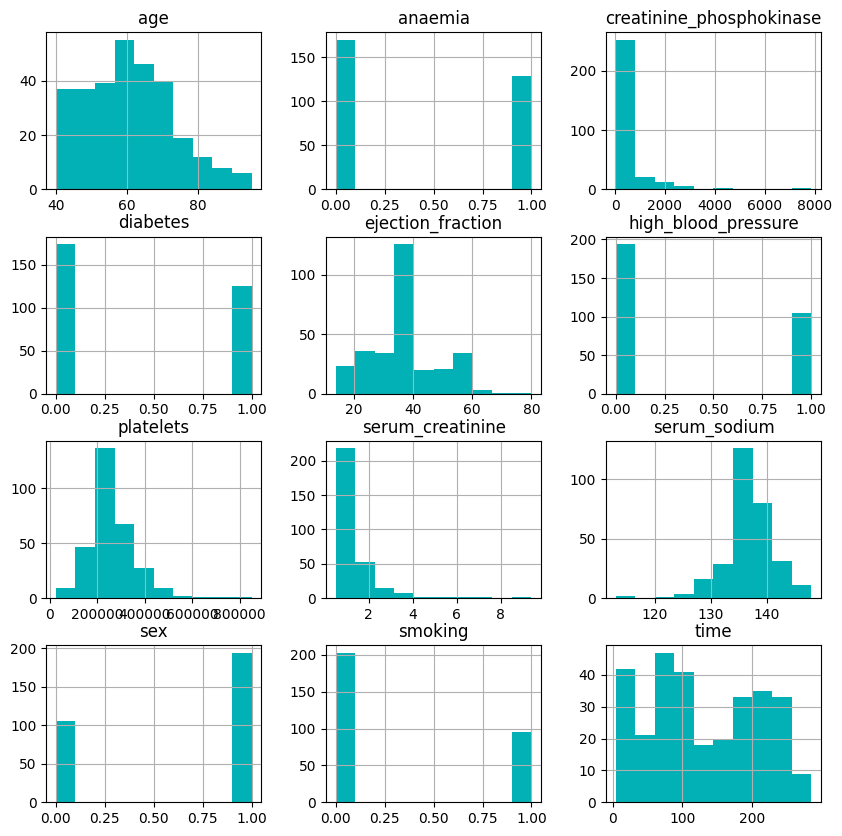

In [13]:
df.iloc[:,:-1].hist(figsize=(10,10), color='#01b1b5')
plt.show()

In [14]:
Y = []
for i in pd.unique(y):
    Y.append(i)
    
nY = []
tmp0 = 0; #index#
for i in Y:
    nY.append(0)
    for j in y:
        if j == i:
            nY[tmp0] += 1    
    tmp0 += 1

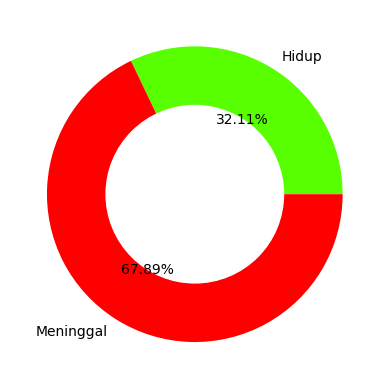

In [19]:
names = ['Hidup', 'Meninggal']
marks = nY
my_circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(marks, labels=names, autopct='%.2f%%', colors=['#57FF00', '#FF0000'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

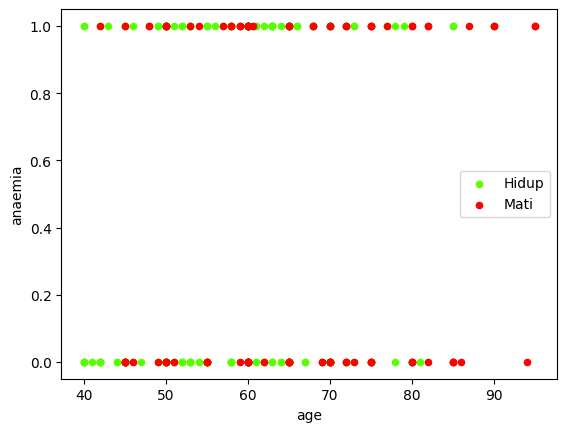

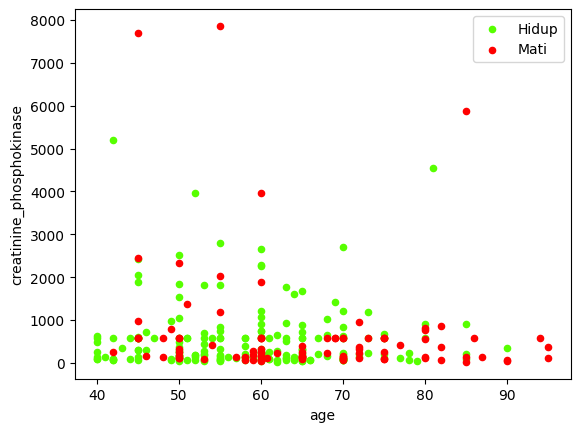

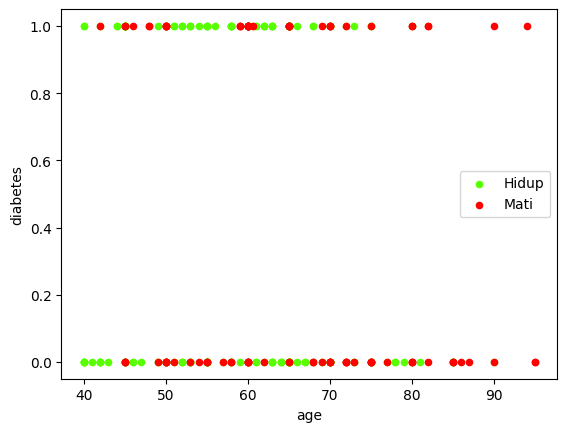

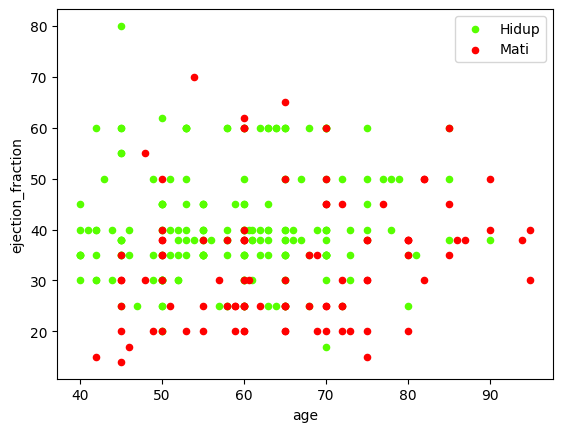

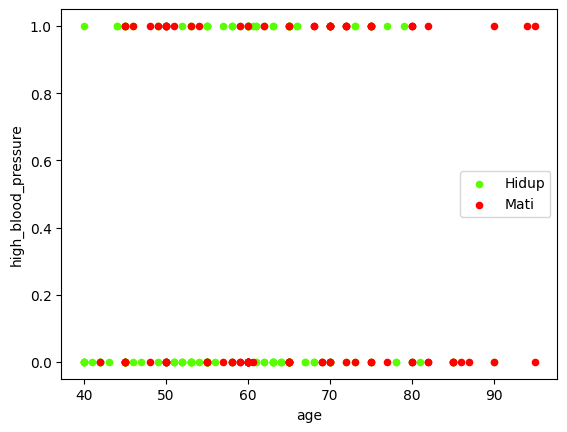

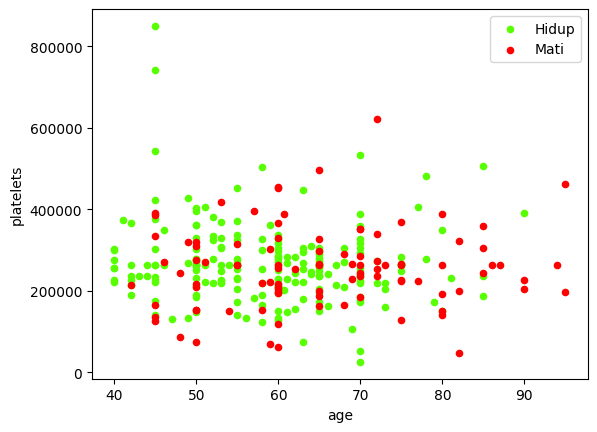

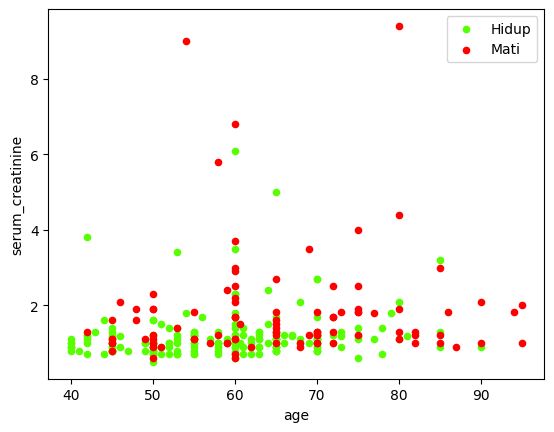

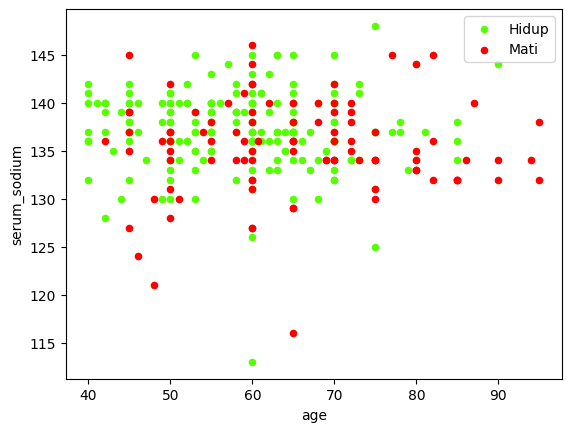

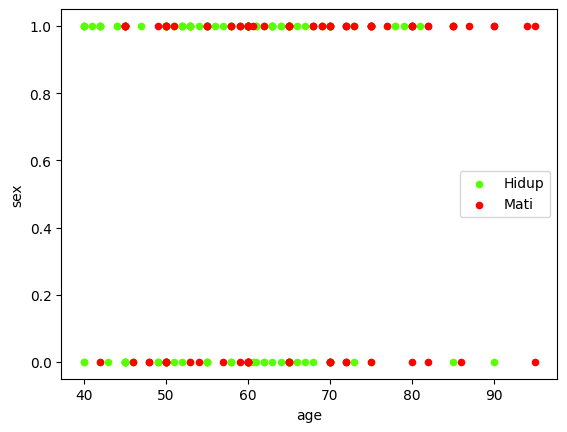

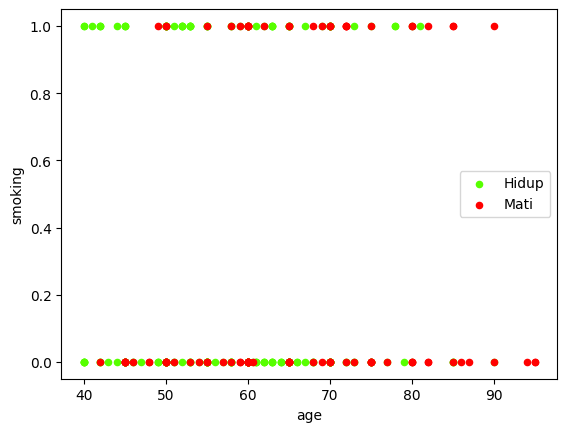

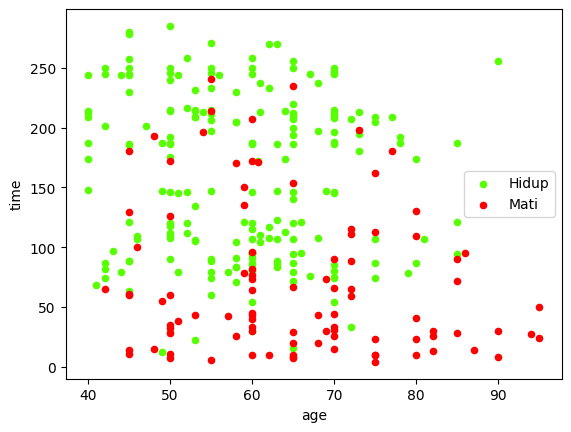

In [23]:
tmp0 = 0
for i in df.columns:
    if (tmp0 > 0) and (tmp0 < len(df.columns)-1):
        ax = df[df['DEATH_EVENT'] == 0].plot(kind='scatter',
                                                      x='age', 
                                                      y=i,
                                                      color='#57FF00', 
                                                      label='Hidup');
        df[df['DEATH_EVENT'] == 1].plot(kind='scatter', 
                                                         x='age', 
                                                         y=i, 
                                                         color='#FF0000', 
                                                         label='Mati', 
                                                         ax=ax);
        plt.show()
    tmp0 += 1

## 2. Metode Regresi Linear

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Membuat model linear regression
model = LinearRegression()

# Train model dalam training set
model.fit(x_train, y_train)

# Membuat Prediksi dalam test set
y_pred = model.predict(x_test)

# Menghitun mean squared error (MSE) dan R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print('R-squared score: {:.2f}'.format(r2))
print('Mean squared error: {:.2f}'.format(mse))

R-squared score: 0.26
Mean squared error: 0.18


## KESIMPULAN
Berdasarkan hasil pengujian pada data set heart_failure_clinical_records_dataset, kita menggunakan metode regresi linear untuk memprediksi kolom age dengan menggunankan kolom-kolom lain sebagai fitur atau variabel independen. Berikut adalah hasil evaluasi model:

1.   Mean squared error (MSE): 0.18
2.   R-squared score: 0.26

Jika MSE = 0.18 dan R-squared scorenya 0.26, maka dapat disimpulkan bahwa model regresi linear memiliki kesalahan prediksi yang relatif kecil, yang dapat diinterpretasikan sebagai model yang relatif akurat. Namun, nilai R-squared yang cukup rendah menunjukkan bahwa model hanya mampu menjelaskan sekitar 26% dari variasi data, yang berarti masih ada faktor lain yang mempengaruhi variabel target yang belum dimasukkan dalam model atau faktor-faktor tersebut tidak dapat dijelaskan dengan fitur yang tersedia. Oleh karena itu, mungkin perlu mempertimbangkan model yang lebih kompleks atau menambahkan fitur tambahan untuk meningkatkan kinerja model.